# Sistema de exoplanetas K2-266

In [25]:
import numpy as np
import matplotlib.pyplot as plt

file_exo = open("Datos2_exo.txt","r")
lineas_exo = file_exo.readlines()
file_exo.close()
header_exo = lineas_exo[0].split()
saltos_exo = lineas_exo[1:]
datos_exo = [linea.strip() for linea in saltos_exo]
datos_exo

################################
#            Listas            #
################################
masa_tierra = []
radio_terrestre = []
masa_jupiter = []
radio_jupiter = []
semieje_mayor = []

periodo_orbital = []
# Transformación en años
periodo_orbital_años = []

tipo_estrella_y_masa = []
tipo_planeta = []
zona_habitable = []

for lin in datos_exo:
    masa_tierra.append(float(lin.split()[0]))
    radio_terrestre.append(float(lin.split()[1]))
    masa_jupiter.append(float(lin.split()[2]))
    radio_jupiter.append(float(lin.split()[3]))
    semieje_mayor.append(float(lin.split()[4]))
    periodo_orbital.append(float(lin.split()[5]))
    tipo_estrella_y_masa.append(lin.split()[6])
    tipo_planeta.append(lin.split()[7])
    zona_habitable.append(lin.split()[8])

periodo_orbital = np.array(periodo_orbital)

for i in range(len(periodo_orbital)):
    x = periodo_orbital[i] / 365
    periodo_orbital_años.append(x)

################################
#            Kepler            #
################################

eje_exo = np.array(semieje_mayor)
periodo_exo = np.array(periodo_orbital_años)
T_2_exo = []
a_3_exo = []
K_exo = []

# T_2

for i in range(len(datos_exo)):
    c = (periodo_exo[i]**2)
    T_2_exo.append(c)

# a_3

for i in range(len(datos_exo)):
    c = (eje_exo[i]**3)
    a_3_exo.append(c)

# constante
for i in range(len(datos_exo)):
    c = (periodo_exo[i]**2)/(eje_exo[i]**3)
    K_exo.append(c)

In [26]:
print(periodo_orbital)

[ 0.66  7.81 10.46 14.76]


In [27]:
print(K_exo)

[np.float64(1.4882369576623748), np.float64(1.4560946316918315), np.float64(0.751563994569219), np.float64(0.8372534524300995)]


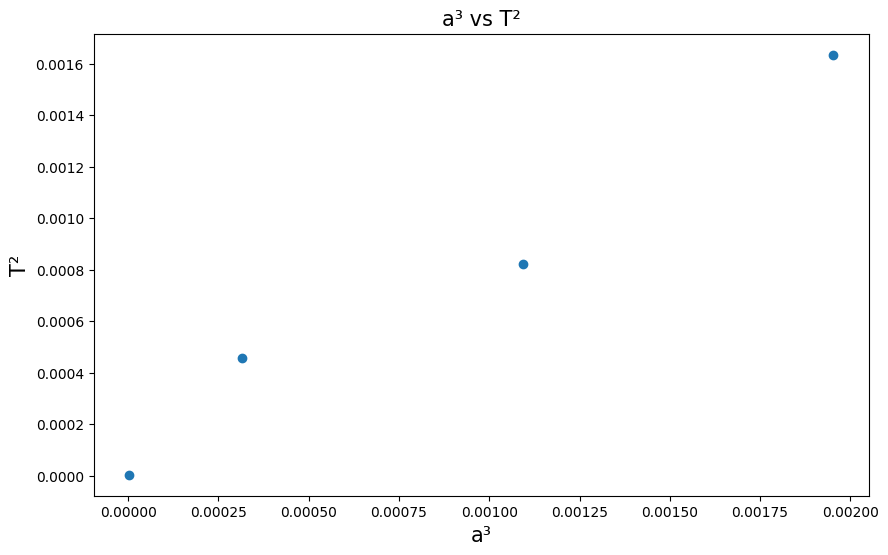

In [28]:
################################
#           Gráfico            #
################################

plt.figure(figsize=(10, 6))
plt.scatter(a_3_exo, T_2_exo)
plt.title("a³ vs T²", fontsize=15)
plt.xlabel("a³", fontsize=15)
plt.ylabel("T²", fontsize=15)
plt.show()

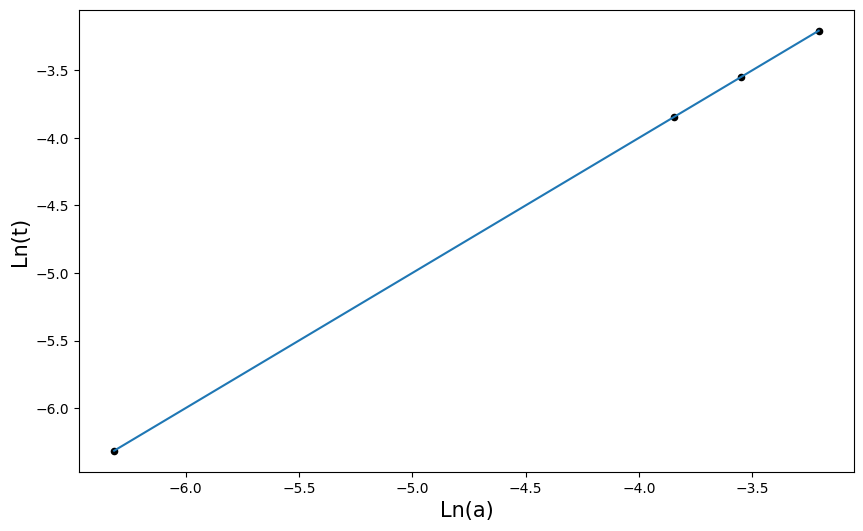

In [29]:
y_2 = np.log(periodo_orbital_años)
x_2 = 3/2*(np.log(eje_exo))+(np.log(K_exo)/2)
################################
#           Gráfico 2          #
################################
plt.figure(figsize=(10, 6))
plt.plot(x_2, y_2)
plt.scatter(x_2,y_2,s = 20, c = "black")
plt.xlabel("Ln(a)", fontsize=15)
plt.ylabel("Ln(t)", fontsize=15)
plt.show()

# Cálculo sin linealizar:

In [30]:
x = np.array(a_3_exo)
y = np.array(T_2_exo)

# Pendiente
dat1_exo = len(eje_exo)*(np.sum(x*y))-(np.sum(x))*(np.sum(y))
dat2_exo = len(eje_exo)*(np.sum(x**2))-((np.sum(x))**2)
m_exo = dat1_exo/dat2_exo
print(f"Pendiente caso normal {m_exo}")

# Intercepto
b_1_exo = (np.sum(y)*np.sum(x**2)) - (np.sum(x)*np.sum(x*y))
b_2_exo = len(eje_exo)*(np.sum(x**2))-((np.sum(x))**2)
b_exo = b_1_exo/b_2_exo
print(f"Intercepto {b_exo}")

# Coeficiente de correlación
r_1_exo = (len(x))*(np.sum(x*y)) - (np.sum(x)*np.sum(y))
r_2_exo = np.sqrt(((len(x)*np.sum(x**2))-(np.sum(x)**2))*((len(y)*np.sum(y**2))-(np.sum(y)**2)))
r_exo = r_1_exo / r_2_exo
print(f"Coef. Correlación {r_exo}")

# Calcular D Mayúscula
D_exo = np.sum(((x-np.mean(x))**2))
D_exo = np.array(D_exo)
print(f"D Mayús. : {D_exo}")

# Calcular d
d_exo = y-m_exo*x-b_exo
d_exo = np.array(d_exo)
d_2_exo = d_exo**2
print(f"d minus. : {d_2_exo}")

# Incertidumbre pendiente
inter_exo = ((np.sum(d_exo**2))/(D_exo*((len(x))-2)))
inc_m_exo = np.sqrt(inter_exo)
print(f"Incertidumbre pendiente: {inc_m_exo}")

# incertidumbre intercepto
inc_b_ins_exo = ((1/len(x)) + ((np.mean(x)**2)/D_exo)) * (np.sum(d_exo**2)/(len(x)-2))
inc_b_exo = np.sqrt(inc_b_ins_exo)
print(f"Incertidumbre intercepto : {inc_b_exo}")

# Ecuacion en cuestion

print(f"Ecuacion = ({m_exo})x -+ {b_exo}")
print(f"Ecuacion con valores de incertiidumbre\ny = ({m_exo} +- {inc_m_exo})x + ({b_exo} +- {inc_b_exo})")


Pendiente caso normal 0.7814929063184538
Intercepto 7.246806826717651e-05
Coef. Correlación 0.9870068874810402
D Mayús. : 2.2810522527467494e-06
d minus. : [5.02898709e-09 1.95016481e-08 1.10611913e-08 1.32781882e-09]
Incertidumbre pendiente: 0.08995931609597514
Incertidumbre intercepto : 0.00010165424483788796
Ecuacion = (0.7814929063184538)x -+ 7.246806826717651e-05
Ecuacion con valores de incertiidumbre
y = (0.7814929063184538 +- 0.08995931609597514)x + (7.246806826717651e-05 +- 0.00010165424483788796)


# Cálculo por medio de log()

In [31]:
x_log = np.log(eje_exo)
y_log = np.log(periodo_orbital_años)

In [32]:
x_log = np.log(eje_exo)
y_log = np.log(periodo_orbital_años)

# Pendiente
dat1_exo_log = len(eje_exo)*(np.sum(x_log*y_log))-(np.sum(x_log))*(np.sum(y_log))
dat2_exo_log = len(eje_exo)*(np.sum(x_log**2))-((np.sum(x_log))**2)
m_exo_log = dat1_exo_log/dat2_exo_log
print(f"Pendiente lineal {m_exo_log}")

# Intercepto
b_1_exo_log = (np.sum(y_log)*np.sum(x_log**2)) - (np.sum(x_log)*np.sum(x_log*y_log))
b_2_exo_log = len(eje_exo)*(np.sum(x_log**2))-((np.sum(x_log))**2)
b_exo_log = b_1_exo_log/b_2_exo_log
print(f"Intercepto {b_exo_log}")

# Coeficiente de correlación
r_1_exo_log = (len(x_log))*(np.sum(x_log*y_log)) - (np.sum(x_log)*np.sum(y_log))
r_2_exo_log = np.sqrt(((len(x_log)*np.sum(x_log**2))-(np.sum(x_log)**2))*((len(y_log)*np.sum(y_log**2))-(np.sum(y_log)**2)))
r_exo_log = r_1_exo_log / r_2_exo_log
print(f"Coef. Correlación {r_exo_log}")

# Calcular D Mayúscula
D_exo_log = np.sum(((x_log-np.mean(x_log))**2))
D_exo_log = np.array(D_exo_log)
print(f"D Mayús. : {D_exo_log}")

# Calcular d
d_exo_log = y_log-m_exo_log*x_log-b_exo_log
d_exo_log = np.array(d_exo_log)
d_2_exo_log = d_exo_log**2
print(f"d minus. : {d_2_exo_log}")

# Incertidumbre pendiente
inter_exo_log = ((np.sum(d_exo_log**2))/(D_exo_log*((len(x_log))-2)))
inc_m_exo_log = np.sqrt(inter_exo_log)
print(f"Incertidumbre pendiente: {inc_m_exo_log}")

# Incertidumbre intercepto
inc_b_ins_exo_log = ((1/len(x_log)) + ((np.mean(x_log)**2)/D_exo_log)) * (np.sum(d_exo_log**2)/(len(x_log)-2))
inc_b_exo_log = np.sqrt(inc_b_ins_exo_log)
print(f"Incertidumbre intercepto : {inc_b_exo_log}")

# Ecuación en cuestión
print(f"Ecuacion = ({m_exo_log})x -+ {b_exo_log}")
print(f"Ecuacion con valores de incertiidumbre\ny = ({m_exo_log} +- {inc_m_exo_log})x + ({b_exo_log} +- {inc_b_exo_log})")


Pendiente lineal 1.3686540416817123
Intercepto -0.3350295357059096
Coef. Correlación 0.9964774596901214
D Mayús. : 3.1812244788984634
d minus. : [0.00133842 0.02883817 0.01130452 0.0007242 ]
Incertidumbre pendiente: 0.0814463072811417
Incertidumbre intercepto : 0.24290043132698586
Ecuacion = (1.3686540416817123)x -+ -0.3350295357059096
Ecuacion con valores de incertiidumbre
y = (1.3686540416817123 +- 0.0814463072811417)x + (-0.3350295357059096 +- 0.24290043132698586)
